# Classify Mineral Stone

# Import Libraries

In [ ]:
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

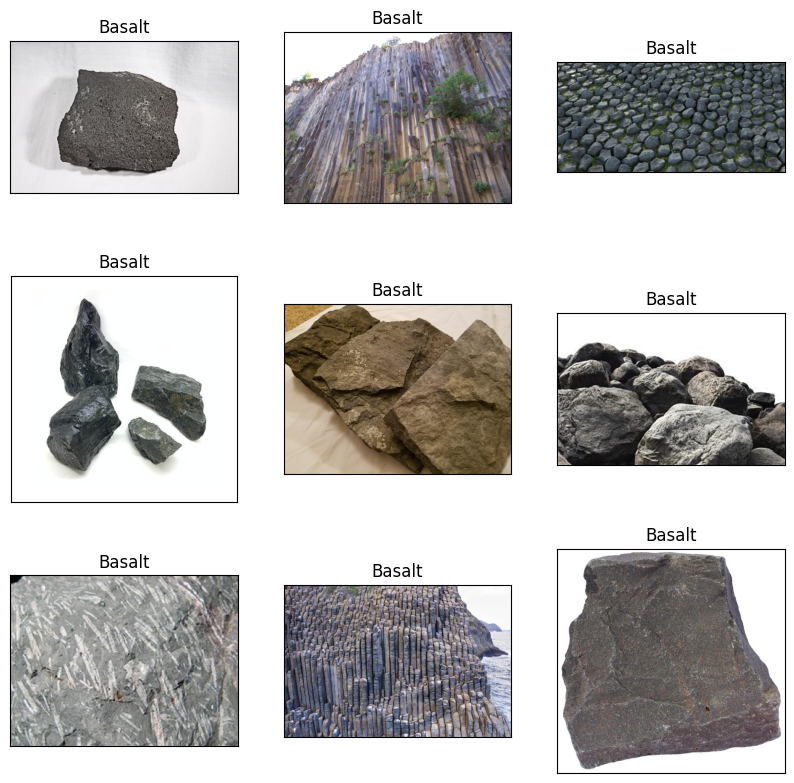

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the basalt folder
basalt_folder_path = '/content/drive/MyDrive/Dataset/train/Basalt'

# Display the top 9 basalt images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# List all files in the basalt folder
basalt_files = os.listdir(basalt_folder_path)

for i, ant_file in enumerate(basalt_files[:9]):  # Display the top 9 basalt images
    row, col = i // 3, i % 3
    ax = axes[row, col]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    # Load and display the image using PIL
    img_path = os.path.join(basalt_folder_path, ant_file)
    pil_img = Image.open(img_path)
    ax.imshow(pil_img)
    ax.set_title('Basalt')

plt.show()

# Mount Google Drive then train test split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Get the dataset
base_path = '/content/drive/MyDrive/Dataset'

# Get a list of all image files
all_images = []
all_labels = []

for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    if os.path.isdir(class_path):
        for filename in os.listdir(class_path):
            if filename.lower().endswith((".png", ".jpg")):
                image_path = os.path.join(class_path, filename)
                all_images.append(image_path)
                all_labels.append(class_name)

# Print information for debugging
print("Number of total samples:", len(all_images))
print("Unique class labels:", set(all_labels))

# Check if there are enough samples for the split
if len(all_images) == 0:
    raise ValueError("No samples found in the dataset. Please check your data.")

# Split the data into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(
    all_images, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

Mounted at /content/drive
Number of total samples: 0
Unique class labels: set()


ValueError: ignored

# Show Sample Basalt Image

# Show Sample Coal Image

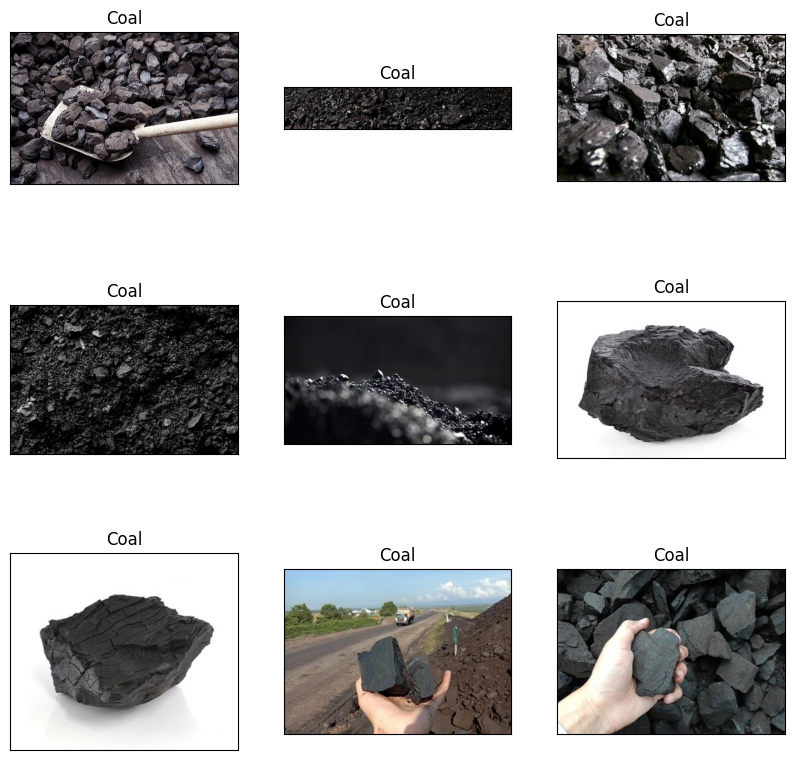

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Define the path to the coal folder
coal_folder_path = '/content/drive/MyDrive/Dataset/train/Coal'

# Display the top 9 coal images
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

# List all files in the coal folder
coal_files = os.listdir(coal_folder_path)

for i, ant_file in enumerate(coal_files[:9]):  # Display the top 9 coal images
    row, col = i // 3, i % 3
    ax = axes[row, col]
    ax.set_xticks([])
    ax.set_yticks([])
    ax.grid(False)

    # Load and display the image using PIL
    img_path = os.path.join(coal_folder_path, ant_file)
    pil_img = Image.open(img_path)
    ax.imshow(pil_img)
    ax.set_title('Coal')

plt.show()

# Create 'train' and 'test' Directories

In [ ]:
# Now, create the 'train' and 'test' directories and move the files accordingly
train_path = '/content/drive/MyDrive/Dataset/train'
test_path = '/content/drive/MyDrive/Dataset/test'

# Create 'train' directory if not exists
if not os.path.exists(train_path):
    os.makedirs(train_path)

# Create 'test' directory if not exists
if not os.path.exists(test_path):
    os.makedirs(test_path)

# Move Training Images

In [ ]:
# Move training images
for i in range(len(train_images)):
    dest_path = os.path.join(train_path, train_labels[i])
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    os.rename(train_images[i], os.path.join(dest_path, os.path.basename(train_images[i])))

# Move Testing Images

In [ ]:
# Move testing images
for i in range(len(test_images)):
    dest_path = os.path.join(test_path, test_labels[i])
    if not os.path.exists(dest_path):
        os.makedirs(dest_path)
    os.rename(test_images[i], os.path.join(dest_path, os.path.basename(test_images[i])))

# Build CNN Model

In [ ]:
# Create ImageDataGenerators with data normalization
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Define batch size and image size
batch_size = 128
img_size = (250, 250)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# Build CNN Model with normalization
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(250, 250, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Found 1616 images belonging to 7 classes.
Found 405 images belonging to 7 classes.


# Train the Model

In [ ]:
# Train the model
epochs = 10

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/10
12/12 [==============================] - 470s 38s/step - loss: 1.8288 - accuracy: 0.2688 - val_loss: 1.6755 - val_accuracy: 0.4141
Epoch 2/10
12/12 [==============================] - 248s 21s/step - loss: 1.5847 - accuracy: 0.4173 - val_loss: 1.4984 - val_accuracy: 0.3906
Epoch 3/10
12/12 [==============================] - 260s 22s/step - loss: 1.4630 - accuracy: 0.4785 - val_loss: 1.3759 - val_accuracy: 0.5156
Epoch 4/10
12/12 [==============================] - 249s 21s/step - loss: 1.3825 - accuracy: 0.4926 - val_loss: 1.3360 - val_accuracy: 0.5130
Epoch 5/10
12/12 [==============================] - 268s 22s/step - loss: 1.3141 - accuracy: 0.5169 - val_loss: 1.2821 - val_accuracy: 0.5312
Epoch 6/10
12/12 [==============================] - 252s 21s/step - loss: 1.2401 - accuracy: 0.5531 - val_loss: 1.2548 - val_accuracy: 0.5495
Epoch 7/10
12/12 [==============================] - 246s 20s/step - loss: 1.1965 - accuracy: 0.5591 - val_loss: 1.2254 - val_accuracy: 0.5521
Epoch 

# Evaluate and Visualize Results

4/4 [==============================] - 20s 4s/step - loss: 1.2215 - accuracy: 0.5432
Test Accuracy: 54.32%


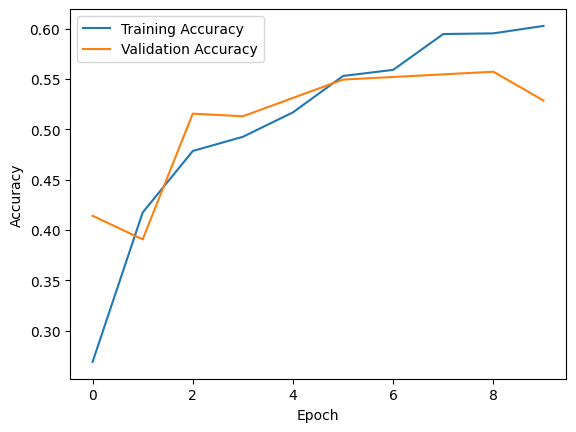

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()